In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df=pd.read_csv('/content/KaggleV2-May-2016.csv')

In [ ]:
# ✅ PART 1: Import and Clean Appointment Data

# Fix typo in column name
df.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)

# Convert dates and remove timezone info
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.tz_localize(None)
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date  # timezone-naive

# Convert 'No-show' to binary
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})

# Drop ID columns
df_cleaned = df.drop(['PatientId', 'AppointmentID'], axis=1)

# Remove negative ages
df_cleaned = df_cleaned[df_cleaned['Age'] >= 0]

# Feature: Days between scheduling and appointment
df_cleaned['DaysBetween'] = (pd.to_datetime(df_cleaned['AppointmentDay']) - df['ScheduledDay']).dt.days

# Feature: Day of the week
df_cleaned['AppointmentWeekDay'] = pd.to_datetime(df['AppointmentDay']).dt.day_name()

# Show cleaned data sample
df_cleaned.head()


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysBetween,AppointmentWeekDay
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1.0,Friday
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1.0,Friday
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1.0,Friday
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1.0,Friday
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1.0,Friday


In [ ]:
# ✅ Fix: Drop datetime columns before training
X = df_cleaned.drop(['No-show', 'ScheduledDay', 'AppointmentDay'], axis=1)
y = df_cleaned['No-show']

# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

accuracy, report


(0.8014958682670849,
 {'0': {'precision': 0.801818950930626,
   'recall': 0.9991340361445783,
   'f1-score': 0.8896674265790533,
   'support': 26560.0},
  '1': {'precision': 0.6290322580645161,
   'recall': 0.005910882085480448,
   'f1-score': 0.011711711711711712,
   'support': 6598.0},
  'accuracy': 0.8014958682670849,
  'macro avg': {'precision': 0.7154256044975711,
   'recall': 0.5025224591150294,
   'f1-score': 0.4506895691453825,
   'support': 33158.0},
  'weighted avg': {'precision': 0.7674367023170006,
   'recall': 0.8014958682670849,
   'f1-score': 0.7149659425723364,
   'support': 33158.0}})

In [ ]:
X = df_cleaned.drop(['No-show', 'ScheduledDay', 'AppointmentDay'], axis=1)
y = df_cleaned['No-show']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Show accuracy and report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8014958682670849
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     26560
           1       0.63      0.01      0.01      6598

    accuracy                           0.80     33158
   macro avg       0.72      0.50      0.45     33158
weighted avg       0.77      0.80      0.71     33158



In [ ]:
# Show average no-show rate based on SMS received
sms_trend = df_cleaned.groupby('SMS_received')['No-show'].mean()

print("No-show rate by SMS reminder:")
print(sms_trend)


No-show rate by SMS reminder:
SMS_received
0    0.167035
1    0.275745
Name: No-show, dtype: float64


In [ ]:
# Create age groups
df_cleaned['AgeGroup'] = pd.cut(
    df_cleaned['Age'],
    bins=[0, 18, 35, 60, 100],
    labels=['Child', 'Youth', 'Adult', 'Senior']
)

# Average no-show rate per age group
age_trend = df_cleaned.groupby('AgeGroup')['No-show'].mean()

print("No-show rate by Age Group:")
print(age_trend)


No-show rate by Age Group:
AgeGroup
Child     0.225372
Youth     0.238348
Adult     0.191017
Senior    0.152012
Name: No-show, dtype: float64


/tmp/ipython-input-8-2765645566.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_trend = df_cleaned.groupby('AgeGroup')['No-show'].mean()


In [ ]:
# Average no-show rate by day of the week
weekday_trend = df_cleaned.groupby('AppointmentWeekDay')['No-show'].mean().sort_values()

print("No-show rate by Appointment Weekday:")
print(weekday_trend)


No-show rate by Appointment Weekday:
AppointmentWeekDay
Thursday     0.193541
Wednesday    0.196892
Tuesday      0.200936
Monday       0.206481
Friday       0.212261
Saturday     0.230769
Name: No-show, dtype: float64


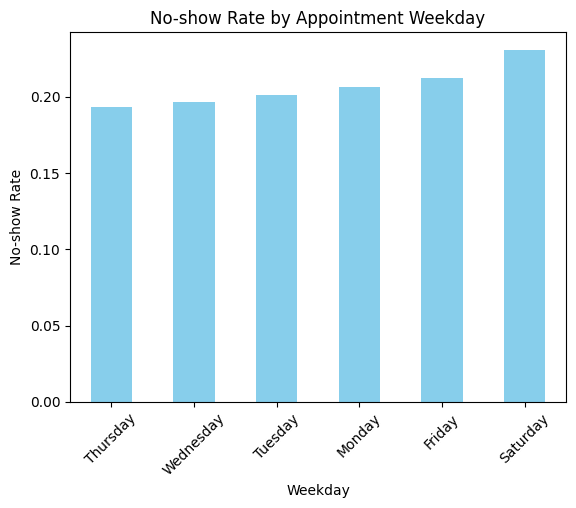

In [ ]:
import matplotlib.pyplot as plt

# Plot weekday trend
weekday_trend.plot(kind='bar', color='skyblue', title='No-show Rate by Appointment Weekday')
plt.ylabel('No-show Rate')
plt.xlabel('Weekday')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df_cleaned['Predicted'] = model.predict(X)
df_cleaned.to_csv("no_show_predictions.csv", index=False)